In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Salaries.csv')
data.head()

C:\apps\sc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
data=data.drop(['Id','Notes','Agency'],axis=1)
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN


In [4]:
data[['Year', 'TotalPay']].groupby('Year').mean()

,TotalPay
Year,
2011,71744.103871
2012,74113.262265
2013,77611.443142
2014,75463.918140


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Status              38119 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 11.3+ MB


In [6]:
data.Status.unique()

array([nan, 'PT', 'FT'], dtype=object)

In [7]:
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Status              38119 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB


In [9]:
data.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110535
dtype: int64

In [10]:
# fill 0 in ´nan values for float values
data['BasePay'].fillna(value=0, inplace=True)
data['OvertimePay'].fillna(value=0, inplace=True)
data['OtherPay'].fillna(value=0, inplace=True)
data['Benefits'].fillna(value=0, inplace=True)
data['Status'].fillna(value='ND', inplace=True)

In [11]:
data.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Status              0
dtype: int64

In [12]:
num_list=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64']]
print(num_list)
data_num=data[num_list]

['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']


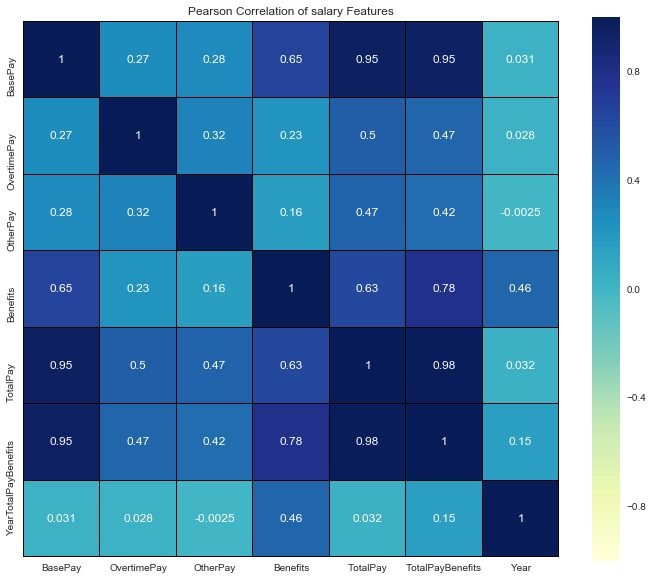

In [13]:
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of salary Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [14]:
data.JobTitle.value_counts()

Transit Operator                                   7036
Special Nurse                                      4389
Registered Nurse                                   3736
Public Svc Aide-Public Works                       2518
Police Officer 3                                   2421
Custodian                                          2418
TRANSIT OPERATOR                                   2388
Firefighter                                        2359
Recreation Leader                                  1971
Patient Care Assistant                             1945
Deputy Sheriff                                     1933
Police Officer                                     1476
SPECIAL NURSE                                      1402
Public Service Trainee                             1328
REGISTERED NURSE                                   1219
Police Officer 2                                   1141
Attorney (Civil/Criminal)                          1126
Porter                                          

In [15]:
def find_job_title(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 
                             'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for aide in aide_title:
        if aide in row.lower():
            return 'assistant'
    for transit in transit_title:
        if transit in row.lower():
            return 'transit'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for court in court_title:
        if court in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for automotive in automotive_title:
        if automotive in row.lower():
            return 'automotive'
    for engineer in engineer_title:
        if engineer in row.lower():
            return 'engineer'
    for general_laborer in general_laborer_title:
        if general_laborer in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'
    
data['CombJobTitle'] = data['JobTitle'].map(find_job_title)

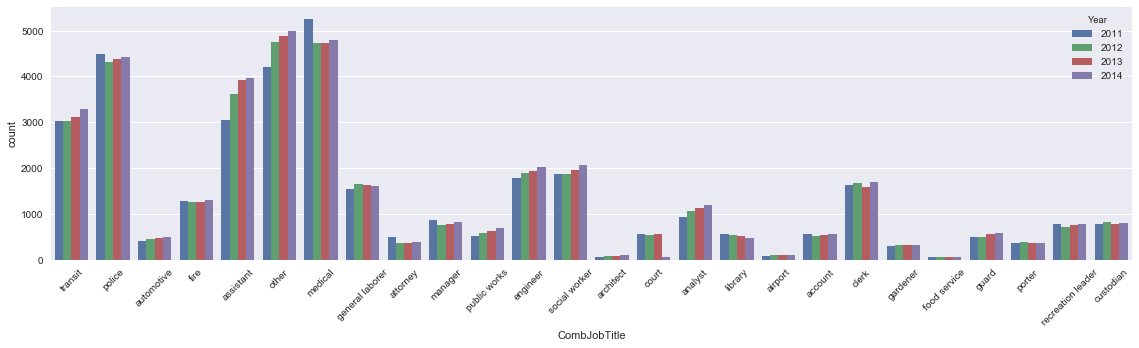

In [16]:
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = data, hue = 'Year')
plt.xticks(rotation = 45)
plt.tight_layout()

In [17]:
data.CombJobTitle.value_counts()

medical              19496
other                18847
police               17622
assistant            14540
transit              12469
social worker         7784
engineer              7667
clerk                 6627
general laborer       6466
fire                  5129
analyst               4336
manager               3258
custodian             3214
recreation leader     3077
public works          2460
account               2207
guard                 2193
library               2127
automotive            1878
court                 1762
attorney              1642
porter                1508
gardener              1274
airport                411
architect              370
food service           290
Name: CombJobTitle, dtype: int64

In [18]:
X=data.drop(['EmployeeName','JobTitle','CombJobTitle'],axis=1)
y=data['CombJobTitle']
X.shape

(148654, 8)

In [19]:
y.shape

(148654,)

In [20]:
num_list=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64']]
print(num_list)
data_num=data[num_list]

['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']


In [21]:
X.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,ND
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,ND
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,ND
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,ND
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,ND


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=pd.DataFrame(data=X)
X_scaled[num_list]=scaler.fit_transform(X[num_list])
X_scaled.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,2.363385,-0.442276,49.219406,-1.102475,9.755700,7.547027,-1.362503,ND
1,2.096514,20.958738,16.652753,-1.102475,9.187847,7.090192,-1.362503,ND
2,3.420311,8.819655,1.589269,-1.102475,5.156926,3.847342,-1.362503,ND
3,0.276596,4.457291,24.161671,-1.102475,5.098801,3.800580,-1.362503,ND
4,1.593689,0.407804,22.166719,-1.102475,4.980614,3.705500,-1.362503,ND


In [24]:
X_transformed=pd.get_dummies(X_scaled)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,y,test_size=0.3)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(Y_test,pred))

Accuracy:  0.514384375631


In [27]:
pred

array(['police', 'gardener', 'clerk', ..., 'analyst', 'assistant',
       'assistant'], dtype=object)

In [30]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import grid_search
from sklearn.metrics import make_scorer, fbeta_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100,250,500], 'max_depth': [3,6,9],'min_samples_split':[2,4,6]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(accuracy_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = grid_search.GridSearchCV(clf,parameters,scoring=scorer,n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train,Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

KeyboardInterrupt: 